### **Problema 1 - integral**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(t):
  return np.exp(-(t**2))

def somat(a, h):
  soma = 0
  for k in range(1, N):
    soma += func(a + k*h)
  return soma

def trapezio(a, h, N, value):
  i_ab = (h/2)*(func(a)+func(value)+2*somat(a, h))
  return i_ab

x = np.arange(0, 3, 0.1)
integrais = []

a, N = 0, len(x)


for value in x:
  h = (value-a)/N

  integrais.append(trapezio(a, h, N, value))

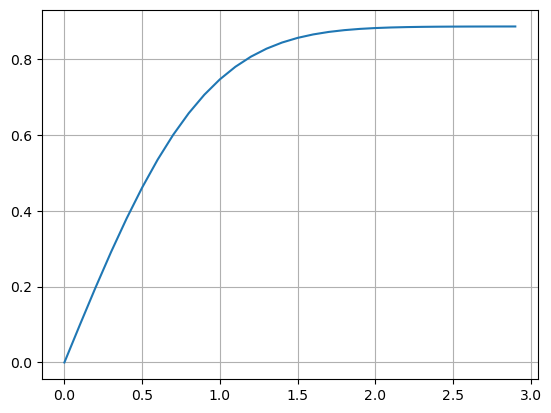

In [2]:
plt.plot(x, integrais)
plt.grid(True)
plt.show()

### **Problema 2 - o limite da difracao de um telescopio**

In [3]:
import numpy as np

x = np.linspace(0, 20, 100)
ms = np.arange(0, 5, 1)

N = 1000
a, b = 0, np.pi
h = (b-a)/N

def func(theta, m, x_value):
    return np.cos(m*theta - x_value*np.sin(theta))

def simpson(a, b, h, m, x_value):
    soma = 0
    for k in range(1, N):
        if k%2 != 0:
            soma += 4*func(a + k*h, m, x_value)
        else:
            soma += 2*func(a + k*h, m, x_value)
    return (h/3)*(func(a, m, x_value) + func(b, m, x_value) + soma)

Js_x = []
for m in ms:
    Js_linha = []
    for x_value in x:
        Js_linha.append((1/np.pi)*simpson(a, b, h, m, x_value))
    Js_x.append(Js_linha)

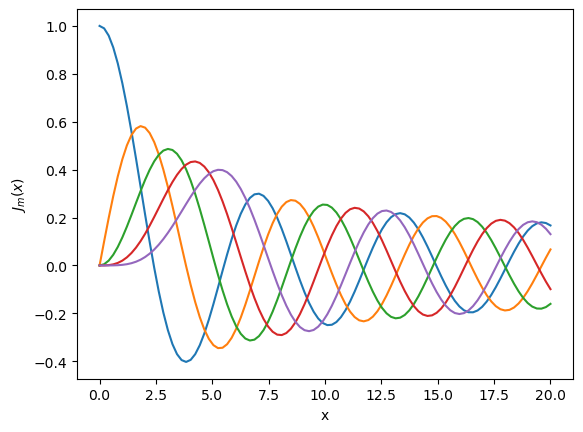

In [4]:
plt.xlabel('x')
plt.ylabel('$J_{m}(x)$')

for m in ms:
    plt.plot(x, Js_x[m])
plt.show()

In [5]:
m_int = 1

J1_x = Js_x[m_int]

xs = np.linspace(-1e-6, 1e-6, 100)
ys = np.linspace(-1e-6, 1e-6, 100)

lamb = 500e-9
k = (2*np.pi)/lamb

I_matriz = []
I_line = []

for i in range(0, 100):
    for j in range(0, 100):
        d = np.sqrt((xs[i]**2 + ys[j]**2))
        temp = d*k
        jkr = (1/np.pi)*simpson(a, b, h, m_int, temp)
        
        I_line.append((jkr/temp)**2)
    I_matriz.append(I_line)
    I_line = []

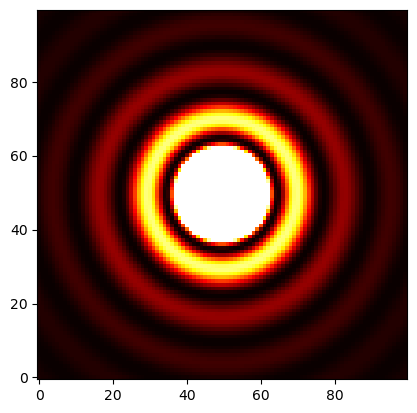

In [6]:
import matplotlib.pyplot as plt
from numpy import loadtxt

plt.imshow(I_matriz, origin = 'lower', vmax = 0.005)
plt.hot()

### **Problema 3 - integral e erro**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 0, 2
N1, N2 = 10, 20
h1, h2 = (b-a)/N1, (b-a)/N2

def func(x):
    return x**4 - 2*x + 1

def simpson(a, b, h, N):
    soma = 0
    for k in range(1, N):
        soma += func(a + k*h)
        
    return (h/2)*(func(a) + func(b) + 2*soma)

I1 = simpson(a, b, h1, N1)
I2 = simpson(a, b, h2, N2)


e2_44 = I2 - 4.4
print(f'erro diferenca: {e2_44}\n')

e2_euler_maclau = (1/3)*(I2-I1)
print(f'erro euler_maclaurin: {abs(e2_euler_maclau)}')

erro diferenca: 0.026660000000000572

erro euler_maclaurin: 0.026633333333333137


**Os dois resultados não concordam perfeitamente por que essa equação para o erro e2 usando a 
formula de Euler-Maclaurin desconsidera os graus maiores do que 2 para o erro, pois ela é demonstrada $(cap5,\ pg.154)$ estimando uma proporcao entre I e h², por $I = I_{i} + ch_{i}^{2}$.**

### **Problema 4 - regra do trapezio adaptativa**

In [8]:
import numpy as np

def func(t):
  return np.sin(np.sqrt(100*t))**2

def somat(a, h, N):
  soma = 0
  for k in range(1, N):
    soma += func(a + k*h)
  return soma

def trapezio(a, b, h, N):
  i_ab = (h/2)*(func(a)+func(b)+2*somat(a, h, N))
  return i_ab
  
a, b = 0, 1
N = 1
e_base = 10e-6

h = (b-a)/N
h2 = (b-a)/(2*N)

I1 = trapezio(a, b, h, N)
I2 = trapezio(a, b, h2, 2*N)

e_atual = (1/3)*(I2-I1)

print(f'numero de fatias N: {N}')
print(f'estimativa da integral I1: {I1}')
print(f'estimativa do erro da integral e_atual: {e_atual}')

numero de fatias N: 1
estimativa da integral I1: 0.147979484546652
estimativa do erro da integral e_atual: 0.05908414108660753


In [9]:
while(abs(e_atual) > e_base):
    N *= 2
    h = (b-a)/N
    h2 = (b-a)/(2*N)
    I1 = trapezio(a, b, h, N)
    I2 = trapezio(a, b, h2, 2*N)
    e_atual = (1/2)*(I2-I1)

print(f'numero de fatias N: {N}')
print(f'estimativa da integral I1: {I1}')
print(f'estimativa do erro da integral e_atual: {e_atual}')

numero de fatias N: 1024
estimativa da integral I1: 0.45582494813241997
estimativa do erro da integral e_atual: 2.8440346132585503e-06
